# Linear Regression Using Ordinary Least Squares regression (OLS)

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt

In here, we import our data.<br>
The dataset represents the changes in Salary With Experiance <br>
I got the data from kaggle: `Salary_Data`  https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv")

In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Representing the data
Now we select the rows we are going to use.

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


We print a plot graph representing the data.

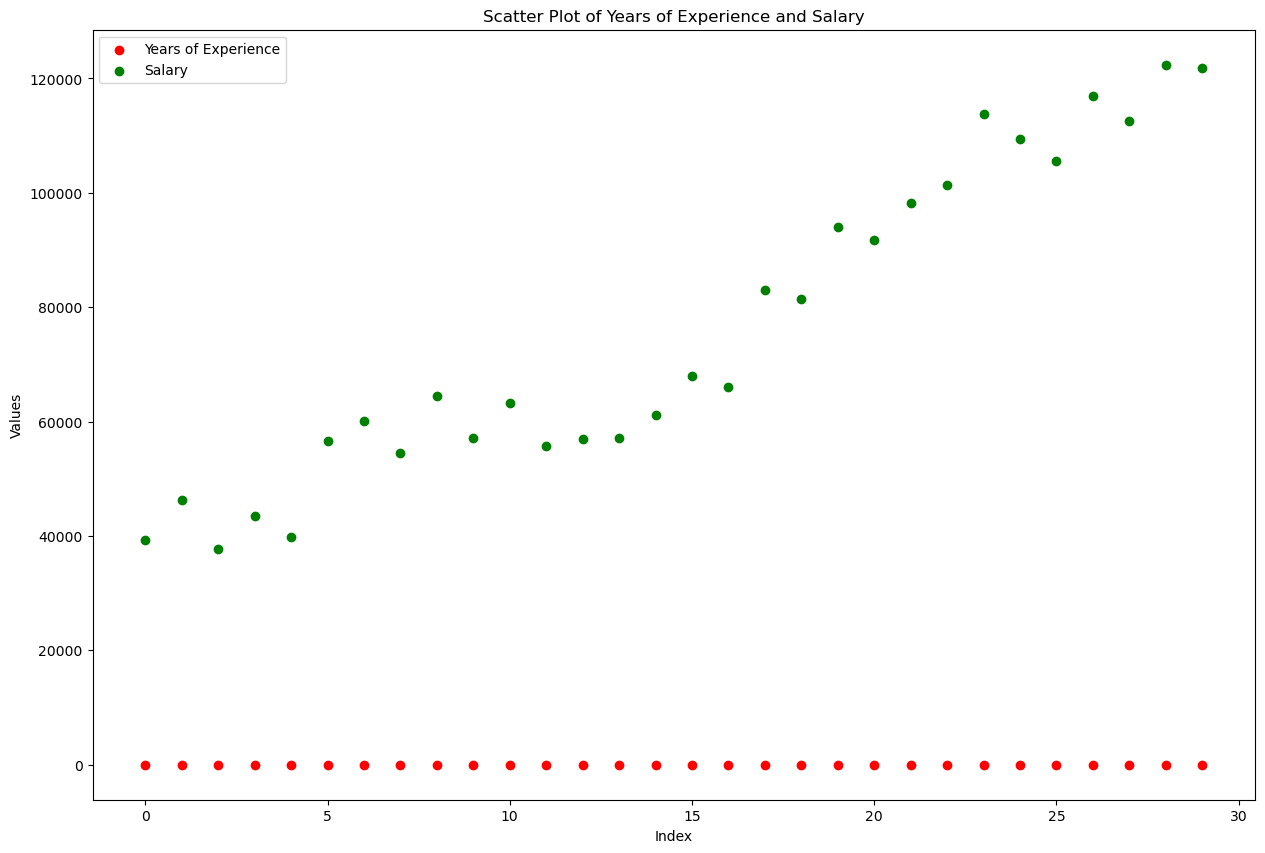

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
x = data['YearsExperience']
y = data['Salary']

# Plot x values (YearsExperience) in red
plt.scatter(range(len(x)), x, color='red', label='Years of Experience')

# Plot y values (Salary) in green
plt.scatter(range(len(y)), y, color='green', label='Salary')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of Years of Experience and Salary')

plt.legend()
plt.show()


## Simple linear regression algorithm
We first declare our Error function. We are going to use the __[Root Mean Squared Error(RMSE)](http://www.statisticshowto.com/rmse/)__ to evaluate our prediction.<br>
The Root Mean Squared Error equation is:<br>
$$
\begin{align*}
RMSE &= \sqrt{\frac{1}{N}\sum_{i=1}^N(Y_i - \hat{Y})^2}
\end{align*}
$$

#### Calculate the mean of a list of numbers

In [8]:
def calculate_mean(values):
    return sum(values)/float(len(values))   

#### Calculate root mean squared error

In [9]:
def root_mean_squared_error(actual_values, predicted_values):
    sum_value = .0
    for i in range(len(actual_values)):
        sum_value += ((predicted_values[i] - actual_values[i]) ** 2)
        
    return sqrt(sum_value/float(len(actual_values)))

We then define our simple linear regression function. To get our line, we need to minimize our loss function. <br>
You can find out more about it in this nice __[document](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf)__. <br>
To resume, the optimal b1 and b0 values can be found using those equations: <br><br>
$$
\begin{align*}
\hat{\beta}_1 &= \frac{\sum_{i=1}^N(X_i - \bar{X})(Y_i-\bar{Y})}{\sum_{i=1}^N(X_i - \bar{X})^2} \\
\hat{\beta}_0 &= \bar{Y} - \hat{\beta}_1 \bar{X} \\
\end{align*}
$$
We can write b1 with covarience and variance formulas:
$$
\DeclareMathOperator{\Var}{Var}
\DeclareMathOperator{\Cov}{Cov}
\begin{align*}
\hat{\beta}_1 &= \frac{\Cov(X,Y)}{\Var(X)}
\end{align*}
$$
Note that Covariance and Varience formulas are:
$$
\begin{align*}
\Cov(X,Y) &= \frac{1}{N}\sum_{i=1}^N(X_i - \bar{X})(Y_i-\bar{Y}) \\
\Var(X) &= \frac{1}{N}\sum_{i=1}^N(X_i - \bar{X})^2
\end{align*}
$$

In [10]:
# Covariance function

In [11]:
def covariance(x,y):
    # calculate the mean of x and y
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)
    
    # calculate covariance
    cov = .0
    for i in range(len(x)):
        cov += (x[i] - mean_x) * (y[i] - mean_y)
        
        
    return cov / float(len(x))

In [12]:
# Variance function

In [13]:
def variance(x):
    # calculate the mean of x
    mean_x = calculate_mean(x)
    
    # calculate variance
    var = .0
    for x_i in x:
        var += ((x_i - mean_x) ** 2)
        
    return var / float(len(x))

#### Equation of best fit line
```python
y = mx + b is the slope intercept form of writing the equation of a straight line. In the equation 'y = mx + b', 'b' is the point, where the line intersects the 'y axis' and 'm' denotes the slope of the line. The slope or gradient of a line describes how steep a line is. It can have either a positive or a negative value.
```
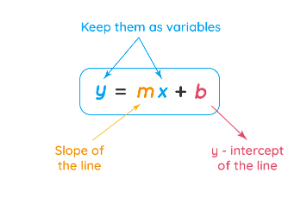

```python
Simple linear regression algorithm
For our example, we are going to try to find the equation of our line
y = m*x + b
```

#### Slope of the function
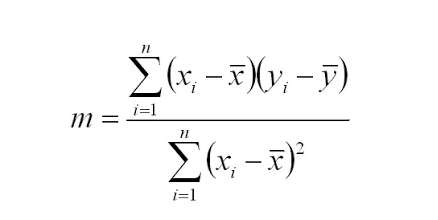

In [14]:
def Slope(x, y):
    # calculate the mean of x and y
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)
    
    # calculate the regression coefficients
    slope =  covariance(x,y) / variance(x)
    return slope

In [15]:
#slope(x,y)

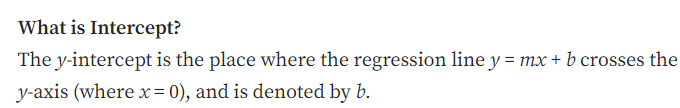
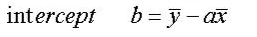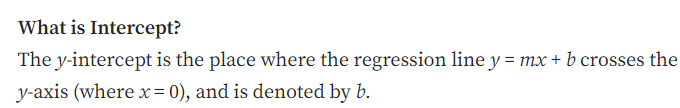

In [16]:
def Intercept(x, y,slope):
    # calculate the mean of x and y
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)
    intercept = mean_y - (slope * mean_x)
    return intercept

#### linear regression plot function

In [17]:
def plot_linear_regression_result(x,y,predicted_y):
    # plotting the actual points as a scatter
    plt.figure(figsize=(12,8))
    plt.scatter(x,y,color = "y", marker = "o",s=30)
    
    # plotting the regression line
    plt.plot(x, predicted_y, color = "m", linewidth=2)
 
    # putting labels
    plt.title('Linear regression of Year of Experiance & Salary')
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
 
    # function to show plot
    plt.show()

#### function for splitting the data into training and testing

In [18]:
def split_data(x,train_split_rate = .5):
    train_x = x.iloc[:int(round(len(x)*train_split_rate))]
    test_x = x.iloc[int(round(len(x)*train_split_rate)):]
    
    train_x.index = range(len(train_x))
    test_x.index = range(len(test_x))
    
    return train_x, test_x


Plotting a nice representation of our simple linear regression result

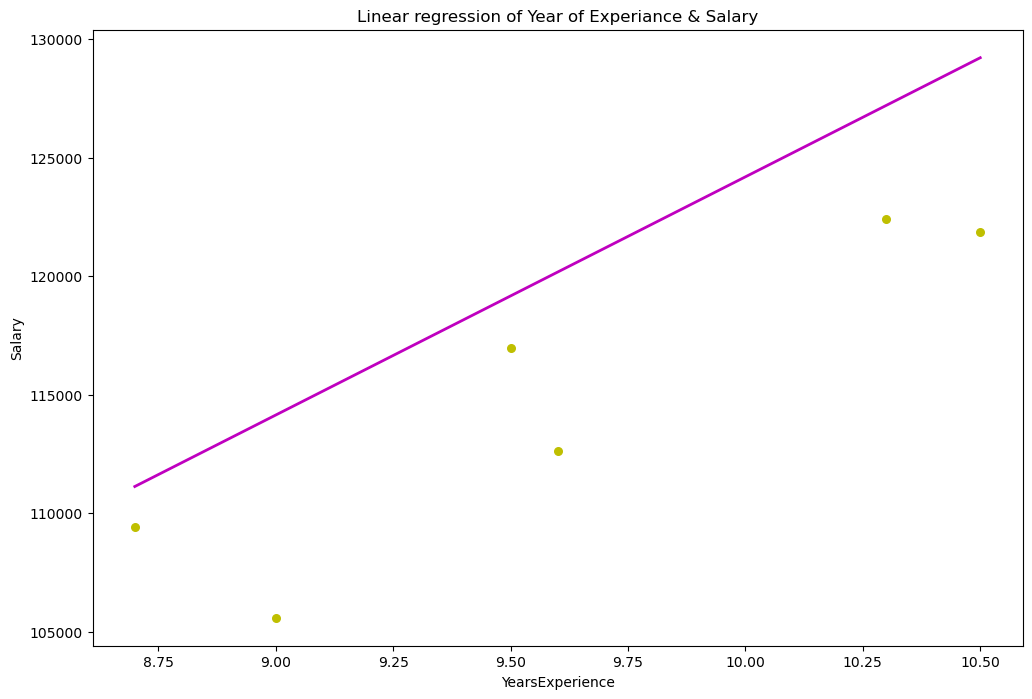

In [42]:
# Split data into features (x) and target (y)
train_data, test_data = split_data(data,train_split_rate=.8)
train_x, train_y = train_data['YearsExperience'], train_data['Salary']
test_x, test_y = test_data['YearsExperience'], test_data['Salary']

# getting the predicted y values
m = Slope(train_x,train_y)
b = Intercept(train_x,train_y,m)

# predicted vector
predicted_y = b + (m * test_x)

# calling the plot function
plot_linear_regression_result(test_x,test_y,predicted_y)

In [44]:
df = pd.DataFrame( {"predicted" : predicted_y,
              "Real_data" : test_y})
df

,predicted,Real_data
0,111119.088330,109431.0
1,114134.924180,105582.0
2,119161.317264,116969.0
3,120166.595881,112635.0
4,127203.546198,122391.0
5,129214.103431,121872.0


The predicted line equation :

In [45]:
print("Y = {} + ({} * X)".format(b,m))

Y = 23659.848673040855 + (10052.78616745599 * X)


And finally, we print our loss.

In [46]:
rmse = root_mean_squared_error(test_y,predicted_y)
print("Root Mean Squared Error value = {}".format(rmse))

Root Mean Squared Error value = 5980.5299296682815


### Checking the accuracy of the model 

In [47]:
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(test_y - predicted_y))

# Calculate Mean Squared Error (MSE)
mse = np.mean((test_y - predicted_y) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
total_sum_of_squares = np.sum((test_y - np.mean(test_y)) ** 2)
residual_sum_of_squares = np.sum((test_y - predicted_y) ** 2)
r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 5353.2625472850295
Mean Squared Error (MSE): 35766738.2396581
Root Mean Squared Error (RMSE): 5980.5299296682815
R-squared (R2) Score: 0.07028895951395531


## Implementing simple linear regression using sklearn
We are now going to implement the same algorithm using sklearn

### We import our dependencies

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv")

In [32]:
X = df.iloc[:,:1]
y = df.iloc[:,-1]

And now we split the data into training and testing. With shuffeling of course. And we reshape the training and testing X value.

In [33]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.5,shuffle=True)

train_x = train_x.values.reshape(-1,1)
test_x = test_x.values.reshape(-1,1)

Then we fit our linear regression model.

In [34]:
simple_linear_regression = LinearRegression()
simple_linear_regression.fit(train_x,train_y)

LinearRegression()

We can then test our model with the predict function and see how well it did with the mean_squared_error function

In [35]:
predicted_y = simple_linear_regression.predict(test_x)
rmse = sqrt(mean_squared_error(test_y,predicted_y))

print("Root Mean Squared Error value = {}".format(rmse))

Root Mean Squared Error value = 5754.976724219752


And lastly, a little graph representing the linear regression.

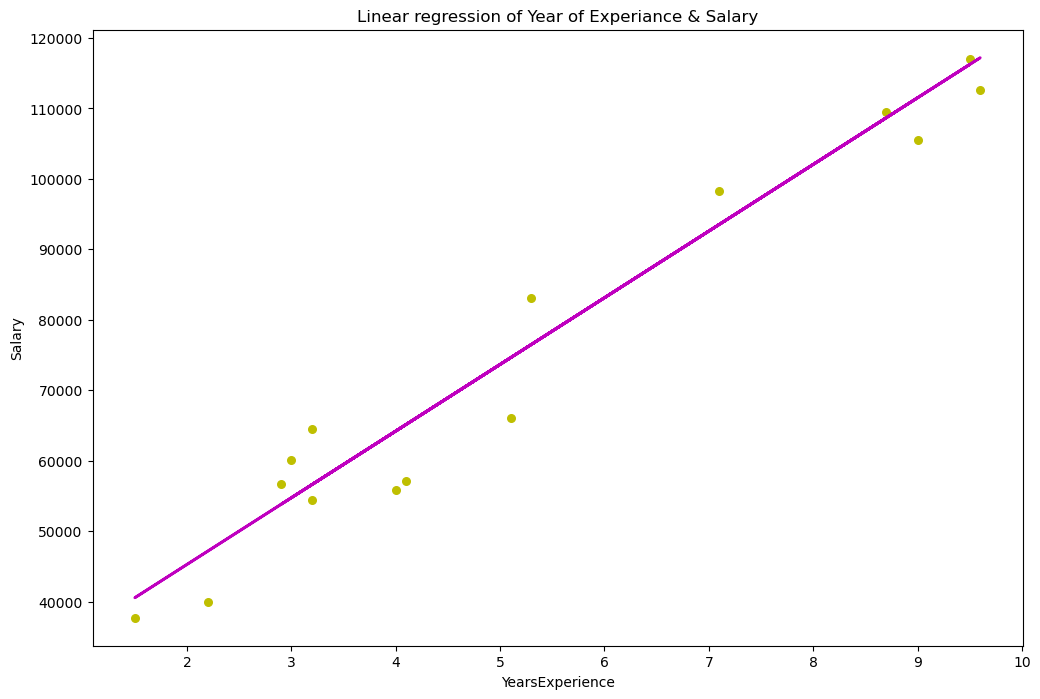

In [36]:
plot_linear_regression_result(test_x,test_y,predicted_y)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, predicted_y)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_y, predicted_y)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(test_y, predicted_y, squared=False)

# Calculate R-squared (R2) Score
r2 = r2_score(test_y, predicted_y)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2*100)


Mean Absolute Error (MAE): 5114.975761891721
Mean Squared Error (MSE): 33119757.096311115
Root Mean Squared Error (RMSE): 5754.976724219752
R-squared (R2) Score: 95.21667763666
